<a href="https://colab.research.google.com/github/its-me-piyush/Alzheimer-s-Classification/blob/main/Alzheimer's_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Models
- Inception v3
- VGG
- SVM
- Custom CNN


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
# os.listdir("Alzheimer_s Dataset/train/MildDemented")

In [ ]:
!unzip -q /content/drive/MyDrive/Alzheimers_Mri_Segmentation/archive.zip

In [ ]:
# from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2

# new data processing with one hot encoder

In [ ]:
# new data processing with one hot encoder

In [ ]:
labels = os.listdir("Alzheimer_s Dataset/train")
labels

['NonDemented', 'ModerateDemented', 'VeryMildDemented', 'MildDemented']

In [ ]:
commonList = []
for i in labels:
  for j in os.listdir(f"Alzheimer_s Dataset/train/{i}"):
    commonList.append((i, 'Alzheimer_s Dataset/train/'+i+'/'+j))
commonList[0] # verymildDem, nonDem, mildDem, moderateDem

('NonDemented', 'Alzheimer_s Dataset/train/NonDemented/nonDem1501.jpg')

In [ ]:
commonTestList = []
for i in labels:
  for j in os.listdir(f"Alzheimer_s Dataset/test/{i}"):
    commonTestList.append((i, 'Alzheimer_s Dataset/test/'+i+'/'+j))
len(commonTestList) # verymildDem, nonDem, mildDem, moderateDem

1279

In [ ]:
commonTestList[0]

('NonDemented', 'Alzheimer_s Dataset/test/NonDemented/32 (70).jpg')

In [ ]:
# import re
# # commonList[0].split(".")[0].split("[a-zA-Z]+")
# finalTrainList = []
# for i in commonList:
#   n = " ".join(re.findall("[a-zA-Z]+", i.split(".")[0]))
#   finalTrainList.append((n, i))
# finalTrainList[0]

In [ ]:
import pandas as pd

train_df = pd.DataFrame(commonList, columns=['Type', 'Path'])
train_df.replace('VeryMildDemented', 'alzheimer', inplace=True)
train_df.replace('NonDemented', 'nonAlzheimer', inplace=True)
train_df.replace('ModerateDemented', 'alzheimer', inplace=True)
train_df.replace('MildDemented', 'alzheimer', inplace=True)
train_df.head()

,Type,Path
0,nonAlzheimer,Alzheimer_s Dataset/train/NonDemented/nonDem15...
1,nonAlzheimer,Alzheimer_s Dataset/train/NonDemented/nonDem54...
2,nonAlzheimer,Alzheimer_s Dataset/train/NonDemented/nonDem14...
3,nonAlzheimer,Alzheimer_s Dataset/train/NonDemented/nonDem16...
4,nonAlzheimer,Alzheimer_s Dataset/train/NonDemented/nonDem23...


In [ ]:
 # verymildDem, nonDem, mildDem, moderateDem

test_df = pd.DataFrame(commonTestList, columns=['Type', 'Path'])
test_df.replace('VeryMildDemented', 'alzheimer', inplace=True)
test_df.replace('NonDemented', 'nonAlzheimer', inplace=True)
test_df.replace('ModerateDemented', 'alzheimer', inplace=True)
test_df.replace('MildDemented', 'alzheimer', inplace=True)
test_df.head()

,Type,Path
0,nonAlzheimer,Alzheimer_s Dataset/test/NonDemented/32 (70).jpg
1,nonAlzheimer,Alzheimer_s Dataset/test/NonDemented/31 (46).jpg
2,nonAlzheimer,Alzheimer_s Dataset/test/NonDemented/27 (68).jpg
3,nonAlzheimer,Alzheimer_s Dataset/test/NonDemented/31 (72).jpg
4,nonAlzheimer,Alzheimer_s Dataset/test/NonDemented/32 (53).jpg


In [ ]:
# test_df.to_csv("drive/My Drive/Alzheimers_Mri_Segmentation/dataFrames/test.csv")
# train_df.to_csv("drive/My Drive/Alzheimers_Mri_Segmentation/dataFrames/train.csv")


In [ ]:
# train_datagen = ImageDataGenerator(rescale = 1./256,                                  
#         rotation_range=10,
#         width_shift_range=0.2,
#         height_shift_range=0.2,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True,
#         vertical_flip=True,
#         fill_mode='nearest')

# valid_datagen = ImageDataGenerator(rescale = 1./256,
#                                   validation_split = 0.2)

# test_datagen  = ImageDataGenerator(rescale = 1./256
#                                   )

In [ ]:
# train_dataset  = train_datagen.flow_from_directory(directory = 'Alzheimer_s Dataset/train',
#                                                    target_size = (256,256),
#                                                    class_mode = 'categorical')

In [ ]:
# train_data, train_labels = train_dataset.next()

In [ ]:
# train_data.shape

In [ ]:
# valid_dataset = valid_datagen.flow_from_directory(directory = 'Alzheimer_s Dataset/train',
#                                                   target_size = (256,256),
#                                                   class_mode = 'categorical',
#                                                   subset = 'validation',
#                                                   batch_size = 32)

In [ ]:
# test_dataset = test_datagen.flow_from_directory(directory = 'Alzheimer_s Dataset/test',
#                                                   target_size = (256,256),
#                                                   class_mode = 'categorical',
#                                                   batch_size = 32)

In [ ]:
# test_data, test_labels = test_dataset.next()

In [ ]:
# test_data.shape

In [ ]:
import pandas as pd

train_df = pd.read_csv("drive/My Drive/Alzheimers_Mri_Segmentation/dataFrames/train.csv")
test_df = pd.read_csv("drive/My Drive/Alzheimers_Mri_Segmentation/dataFrames/test.csv")

In [ ]:
train_df.head()

,Unnamed: 0,Type,Path
0,0,nonDem,Alzheimer_s Dataset/train/NonDemented/nonDem15...
1,1,nonDem,Alzheimer_s Dataset/train/NonDemented/nonDem54...
2,2,nonDem,Alzheimer_s Dataset/train/NonDemented/nonDem14...
3,3,nonDem,Alzheimer_s Dataset/train/NonDemented/nonDem16...
4,4,nonDem,Alzheimer_s Dataset/train/NonDemented/nonDem23...


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def plotAnyImage(train_df, index):
  plt.imshow(mpimg.imread(train_df['Path'][index]))

In [ ]:
print(f'Total numner of images in dataset: {len(train_df)}')
type_count = train_df['Type'].value_counts()
print(f'Type in Each Category:\n{type_count}')

Total numner of images in dataset: 5121
Type in Each Category:
alzheimer       2561
nonAlzheimer    2560
Name: Type, dtype: int64


In [ ]:
import cv2

train_labels = []
train_images = []

im_size = 256

for i in train_df['Type']:
  train_labels.append(i)

for i in range(len(train_df)):
  # print(i)
  print(f'[INFO] Processing image {str(len(train_images))} of {str(len(train_df))}')
  img = cv2.imread(train_df['Path'][i])
  img2 = cv2.resize(img, (256, 256))
  train_images.append(img2)
print('[DONE] All images uploaded and resized.')


In [ ]:
import cv2

test_labels = []
test_images = []

im_size = 256

for i in test_df['Type']:
  test_labels.append(i)

for i in range(len(test_df)):
  # print(i)
  print(f'[INFO] Processing image {str(len(test_images))} of {str(len(test_df))}')
  img = cv2.imread(test_df['Path'][i])
  img2 = cv2.resize(img, (256, 256))
  test_images.append(img2)
print('[DONE] All images uploaded and resized.')


In [ ]:
import numpy as np
train_images = np.array(train_images)
print(f'[INFO] Processed images shape: {train_images.shape}')

[INFO] Processed images shape: (5121, 256, 256, 3)


In [ ]:
import numpy as np
test_images = np.array(test_images)
print(f'[INFO] Processed images shape: {test_images.shape}')

[INFO] Processed images shape: (1279, 256, 256, 3)


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

y = train_labels
y_labelEncoder = LabelEncoder()
y = y_labelEncoder.fit_transform(y)  
y = y.reshape(-1, 1)
onehotencorder = ColumnTransformer(
  [('one_hot_encoder', OneHotEncoder(sparse=False), [0])],
  remainder='passthrough'                     
)
Y = onehotencorder.fit_transform(y)

In [ ]:
Y.shape

(5121, 2)

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

y = test_labels
y_labelEncoder = LabelEncoder()
y = y_labelEncoder.fit_transform(y)  
y = y.reshape(-1, 1)
onehotencorder = ColumnTransformer(
  [('one_hot_encoder', OneHotEncoder(sparse=False), [0])],
  remainder='passthrough'                     
)
Y_test = onehotencorder.fit_transform(y)

In [ ]:
Y_test[0]

array([0., 1.])

In [ ]:
train_images.shape

(5121, 256, 256, 3)

# Custom CNN

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.models import Model
from keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPooling2D, Conv2D

In [ ]:
model= Sequential(name='Custom_CNN')


model.add(Conv2D(32,(3,3),activation='relu',input_shape=(256,256,3)))

model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())


model.add(Conv2D(32,(3,3),activation='relu'))

model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())


model.add(Conv2D(64,(3,3),activation='relu'))

model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())


model.add(Conv2D(64,(3,3),activation='relu'))

model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(4,activation='softmax'))


In [ ]:
model.summary()

Model: "Custom_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 127, 127, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                        

In [ ]:
# tf.keras.utils.plot_model(model,show_shapes=True)

In [ ]:
METRICS = ['accuracy']

In [ ]:
# aucc = 0.69
# class myCallback(tf.keras.callbacks.Callback): 
#     def on_epoch_end(self, epoch, logs={}): 
#         if(logs.get('val_accuracy') > aucc):   
#           print("\nWe have reached %2.2f%% accuracy, so we will stopping training." %(aucc*100))   
#           self.model.stop_training = True

# callbacks = myCallback()

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=METRICS)

In [ ]:
history = model.fit(train_images, Y, validation_data=(test_images, Y_test), epochs=50)

Epoch 1/50
161/161 [==============================] - 26s 75ms/step - loss: 1.1754 - accuracy: 0.6153 - val_loss: 2.3166 - val_accuracy: 0.2033
Epoch 2/50
161/161 [==============================] - 10s 61ms/step - loss: 0.5577 - accuracy: 0.8137 - val_loss: 1.2504 - val_accuracy: 0.5575
Epoch 3/50
161/161 [==============================] - 10s 64ms/step - loss: 0.1623 - accuracy: 0.9422 - val_loss: 1.0086 - val_accuracy: 0.6059
Epoch 4/50
161/161 [==============================] - 11s 66ms/step - loss: 0.0405 - accuracy: 0.9920 - val_loss: 1.0699 - val_accuracy: 0.6701
Epoch 5/50
161/161 [==============================] - 10s 62ms/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 1.0284 - val_accuracy: 0.6552
Epoch 6/50
161/161 [==============================] - 10s 59ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 1.0150 - val_accuracy: 0.6959
Epoch 7/50
161/161 [==============================] - 10s 59ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 1.0319 - val_accuracy:

In [ ]:
model.save('drive/My Drive/Alzheimers_Mri_Segmentation/models/cnn/cnnModel.h5')

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

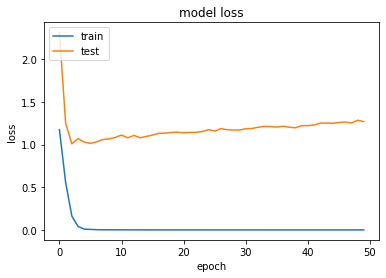

In [ ]:
# summarize history for accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import pandas as pd
histcnn_df = pd.DataFrame(history.history)
histcnn_df

,loss,accuracy,val_loss,val_accuracy
0,1.175353,0.615310,2.316592,0.203284
1,0.557672,0.813708,1.250399,0.557467
2,0.162285,0.942199,1.008639,0.605942
3,0.040452,0.991994,1.069891,0.670055
4,0.008964,1.000000,1.028376,0.655199
5,0.006192,1.000000,1.014975,0.695856
6,0.002504,1.000000,1.031940,0.691947
7,0.001682,1.000000,1.059806,0.701329
8,0.001320,1.000000,1.066437,0.699765
9,0.001081,1.000000,1.084368,0.698202


In [ ]:
histcnn_df.to_csv("drive/My Drive/Alzheimers_Mri_Segmentation/models/cnn/history/cnn.csv")

In [ ]:
# # SVM
# loss, acc = model.evaluate(test_dataset)
# print("Trained model, accuracy: {:5.2f}%".format(100 * acc))

# Custom SVM

In [ ]:
# SVM

model= Sequential(name='Custom_CNN')


model.add(Conv2D(32,(3,3),activation='relu',input_shape=(256,256,3)))

model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())


model.add(Conv2D(32,(3,3),activation='relu'))

model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())


model.add(Conv2D(64,(3,3),activation='relu'))

model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())


model.add(Conv2D(64,(3,3),activation='relu'))

model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(4,kernel_regularizer=l2(0.01), activation='softmax'))


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=METRICS)

In [ ]:
history1 = model.fit(train_images, Y, validation_data=(test_images, Y_test), epochs=50)

In [ ]:
model.save('drive/My Drive/Alzheimers_Mri_Segmentation/models/svm/svmModel.h5')

In [ ]:
histsvm_df = pd.DataFrame(history1.history)
histsvm_df

In [ ]:
histsvm_df.to_csv("drive/My Drive/Alzheimers_Mri_Segmentation/models/svm/history/svm.csv")

In [ ]:
# changeeeee

In [ ]:
very_mild = os.listdir("Alzheimer_s Dataset/train/VeryMildDemented")
mild = os.listdir("Alzheimer_s Dataset/train/MildDemented")
moderate = os.listdir("Alzheimer_s Dataset/train/ModerateDemented")
non = os.listdir("Alzheimer_s Dataset/train/NonDemented")

In [ ]:
very_mild =  ["Alzheimer_s Dataset/train/VeryMildDemented/"+element for element in very_mild]
mild =  ["Alzheimer_s Dataset/train/MildDemented/"+element for element in mild]
moderate =  ["Alzheimer_s Dataset/train/ModerateDemented/"+element for element in moderate]
non =  ["Alzheimer_s Dataset/train/NonDemented/"+element for element in non]

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

print(non[1])
def view_image(directory):
    img = mpimg.imread(directory)
    plt.imshow(img)
    plt.title(directory)
    plt.axis('off')
    print(f'Image shape:{img.shape}')
    return img

print('One of the data in Non Alzheimer Folder')
view_image(non[1])

In [ ]:
print('Alzheimer Patient\'s Brain')
view_image(moderate[1])

In [ ]:
from skimage.transform import resize
import numpy as np
from PIL import Image

def extract_feature(dir_path):
    img = mpimg.imread(dir_path)
    img = img / 255.0  # normalize pixel values
    img = resize(img, (128, 128, 3))  # convert all images to (128x128x3)
    img = np.reshape(img, (128, 384))
    return img

non_ALZ = [extract_feature(filename) for filename in non]
vmild_ALZ = [extract_feature(filename) for filename in very_mild]
mild_ALZ = [extract_feature(filename) for filename in mild]
moderate_ALZ = [extract_feature(filename) for filename in moderate]
ALZ = vmild_ALZ + mild_ALZ + moderate_ALZ

#List where arrays shall be stored
resized_image_array=[]
#List that will store the answer if an image is female (0) or male (1)
resized_image_array_label=[]

width = 256
height = 256
new_size = (width,height) #the data is just black to white 

#Iterate over pictures and resize them to 256 by 256
def resizer(image_directory):
    for file in image_directory: #tried with os.listdir but could work with os.walk as well
        img = Image.open(file) #just putting image_directory or file does not work for google colab, interesting. 
        #preserve aspect ratio
        img = img.resize(new_size)
        array_temp = np.array(img)
        shape_new = width*height
        img_wide = array_temp.reshape(1, shape_new)
        resized_image_array.append(img_wide[0])
        if image_directory == non:
            resized_image_array_label.append(0)
        else:
            resized_image_array_label.append(1)

ALZ = very_mild + mild + moderate
resizer(non)
resizer(ALZ)

In [ ]:
resized_image_array[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [ ]:
print(len(non))
print(len(ALZ)) #data are well transformed. Let's conduct SVM
print(len(resized_image_array))
print(resized_image_array[1])

#split the data to test and training
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(resized_image_array, resized_image_array_label, test_size = 0.2)

2560
2561
5121
[0 0 0 ... 0 0 0]


In [ ]:
from sklearn import decomposition, preprocessing, svm
import sklearn.metrics as metrics

#train SVM model
#from sklearn import svm
clf = svm.SVC(kernel = 'linear')
hist1 = clf.fit(train_x, train_y)
#store predictions and ground truth
y_pred = clf.predict(train_x)
y_true = train_y

#assess the performance of the SVM with linear kernel on Training data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
print('Precision : ', metrics.precision_score(y_true, y_pred))
print('Recall : ', metrics.recall_score(y_true, y_pred))
print('f1 : ', metrics.f1_score(y_true, y_pred)) 
print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred)) #The training seems to be done with high accuracy on training data.

#Now, use the SVM model to predict Test data
y_pred = clf.predict(test_x)
y_true = test_y

#assess the performance of the SVM with linear kernel on Testing data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
print('Precision : ', metrics.precision_score(y_true, y_pred))
print('Recall : ', metrics.recall_score(y_true, y_pred))
print('f1 : ', metrics.f1_score(y_true, y_pred)) 
print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred)) #Having high training data accuracy might mean that it is having some overfitting

Accuracy :  1.0
Precision :  1.0
Recall :  1.0
f1 :  1.0
Confusion matrix : [[2047    0]
 [   0 2049]]
Accuracy :  0.9921951219512195
Precision :  0.9902723735408561
Recall :  0.994140625
f1 :  0.9922027290448344
Confusion matrix : [[508   5]
 [  3 509]]


In [ ]:
metrics.log_loss(y_true, y_pred)

0.26957483819164624

In [ ]:
from joblib import dump, load
dump(clf, 'drive/My Drive/Alzheimers_Mri_Segmentation/models/svm/svm.joblib') 

['drive/My Drive/Alzheimers_Mri_Segmentation/models/svm/svm.joblib']

In [ ]:
s = load("svm.joblib")

In [ ]:
test_x[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [ ]:
y_pre = s.predict(test_x)
y_tru = test_y

#assess the performance of the SVM with linear kernel on Testing data
print('Accuracy : ', metrics.accuracy_score(y_tru, y_pre))
print('Precision : ', metrics.precision_score(y_tru, y_pre))
print('Recall : ', metrics.recall_score(y_tru, y_pre))
print('f1 : ', metrics.f1_score(y_tru, y_pre)) 
print('Confusion matrix :', metrics.confusion_matrix(y_tru, y_pre)) #Having high training data accuracy might mean that it is having some overfitting

Accuracy :  0.9921951219512195
Precision :  0.9902723735408561
Recall :  0.994140625
f1 :  0.9922027290448344
Confusion matrix : [[508   5]
 [  3 509]]


In [ ]:
# Main

In [ ]:

resized_image_array=[]

resized_image_array_label=[]

width = 256
height = 256
new_size = (width,height) 


def resizer(image_directory):
    for file in image_directory: 
        img = Image.open(file) 
        
        img = img.resize(new_size)
        array_temp = np.array(img)
        shape_new = width*height
        img_wide = array_temp.reshape(1, shape_new)
        resized_image_array.append(img_wide[0])
        if image_directory == non:
            resized_image_array_label.append(0)
        elif image_directory == very_mild:
            resized_image_array_label.append(1)
        elif image_directory == mild:
            resized_image_array_label.append(2)
        else:
            resized_image_array_label.append(3)

resizer(non)
resizer(very_mild)
resizer(mild)
resizer(moderate)


from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(resized_image_array, resized_image_array_label, test_size = 0.2)



clf = svm.SVC(kernel = 'linear')
clf.fit(train_x, train_y)

y_pred = clf.predict(train_x)
y_true = train_y


print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))


y_pred = clf.predict(test_x)
y_true = test_y


print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))

Accuracy :  1.0
Accuracy :  0.9921951219512195


In [ ]:
# #Train a SVM using polynomial kernel with degree of 2
# clf = svm.SVC(kernel = 'poly', degree = 2)
# hist2 = clf.fit(train_x, train_y)

# #store predictions and ground truth
# y_pred = clf.predict(train_x)
# y_true = train_y

# #assess the performance of the SVM with linear kernel on Training data
# print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
# print('Precision : ', metrics.precision_score(y_true, y_pred))
# print('Recall : ', metrics.recall_score(y_true, y_pred))
# print('f1 : ', metrics.f1_score(y_true, y_pred)) 
# print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred))

# #Now, use the SVM model to predict Test data
# y_pred = clf.predict(test_x)
# y_true = test_y

# #assess the performance of the SVM with linear kernel on Testing data
# print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
# print('Precision : ', metrics.precision_score(y_true, y_pred))
# print('Recall : ', metrics.recall_score(y_true, y_pred))
# print('f1 : ', metrics.f1_score(y_true, y_pred)) 
# print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred))

In [ ]:
#Train a SVM using RBF kernel
# clf = svm.SVC(kernel = 'rbf')
# hist3 = clf.fit(train_x, train_y)

# #store predictions and ground truth
# y_pred = clf.predict(train_x)
# y_true = train_y

# #assess the performance of the SVM with linear kernel on Training data
# print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
# print('Precision : ', metrics.precision_score(y_true, y_pred))
# print('Recall : ', metrics.recall_score(y_true, y_pred))
# print('f1 : ', metrics.f1_score(y_true, y_pred)) 
# print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred))

# #Now, use the SVM model to predict Test data
# y_pred = clf.predict(test_x)
# y_true = test_y

# #assess the performance of the SVM with linear kernel on Testing data
# print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
# print('Precision : ', metrics.precision_score(y_true, y_pred))
# print('Recall : ', metrics.recall_score(y_true, y_pred))
# print('f1 : ', metrics.f1_score(y_true, y_pred)) 
# print('loss : ', metrics.loss_score(y_true, y_pred))
# print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred))

In [ ]:
hist1

SVC(kernel='linear')

In [ ]:
hist2

SVC(degree=2, kernel='poly')

In [ ]:
hist3

SVC()

In [ ]:
from PIL import Image

In [ ]:
#List where arrays shall be stored
resized_image_array=[]
#List that will store the answer if an image is female (0) or male (1)
resized_image_array_label=[]

width = 256
height = 256
new_size = (width,height) #the data is just black to white 

#Iterate over pictures and resize them to 256 by 256
def resizer(image_directory):
    for file in image_directory: #tried with os.listdir but could work with os.walk as well
        img = Image.open(file) #just putting image_directory or file does not work for google colab, interesting. 
        #preserve aspect ratio
        img = img.resize(new_size)
        array_temp = np.array(img)
        shape_new = width*height
        img_wide = array_temp.reshape(1, shape_new)
        resized_image_array.append(img_wide[0])
        if image_directory == non:
            resized_image_array_label.append(0)
        else:
            resized_image_array_label.append(1)

ALZ = very_mild + mild + moderate
resizer(non)
resizer(ALZ)

In [ ]:
# non

[]

In [ ]:
# print(non[1])
# def view_image(directory):
#     img = mpimg.imread(directory)
#     plt.imshow(img)
#     plt.title(directory)
#     plt.axis('off')
#     print(f'Image shape:{img.shape}')
#     return img

# print('One of the data in Non Alzheimer Folder')
# view_image(non[1])

In [ ]:
Y_test.shape

(1279, 2)

In [ ]:
from sklearn import decomposition, preprocessing, svm
import sklearn.metrics as metrics

# #train SVM model
# #from sklearn import svm
# clf = svm.SVC(kernel = 'linear')
# clf.fit(train_images, Y)
# #store predictions and ground truth
# y_pred = clf.predict(train_images)
# y_true = Y

# #assess the performance of the SVM with linear kernel on Training data
# print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
# print('Precision : ', metrics.precision_score(y_true, y_pred))
# print('Recall : ', metrics.recall_score(y_true, y_pred))
# print('f1 : ', metrics.f1_score(y_true, y_pred)) 
# print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred)) #The training seems to be done with high accuracy on training data.

# #Now, use the SVM model to predict Test data
# y_pred = clf.predict(test_images)
# y_true = Y

# #assess the performance of the SVM with linear kernel on Testing data
# print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
# print('Precision : ', metrics.precision_score(y_true, y_pred))
# print('Recall : ', metrics.recall_score(y_true, y_pred))
# print('f1 : ', metrics.f1_score(y_true, y_pred)) 
# print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred)) #Having high training data accuracy might mean that it is having some overfitting

In [ ]:
# # print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
# #Train a SVM using RBF kernel
# clf = svm.SVC(kernel = 'rbf')
# clf.fit(train_images, Y)

# #store predictions and ground truth
# y_pred = clf.predict(train_images)
# y_true = Y

# #assess the performance of the SVM with linear kernel on Training data
# print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))

# #Now, use the SVM model to predict Test data
# y_pred = clf.predict(test_images)
# y_true = Y_test

# #assess the performance of the SVM with linear kernel on Testing data
# print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))

# Inception V3

In [ ]:
from keras.applications.inception_v3 import InceptionV3
inception_model = InceptionV3(input_shape=(256, 256, 3), include_top=False, weights="imagenet")

87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in inception_model.layers:
    layer.trainable=False

In [ ]:
from keras.models import Sequential
from keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D, GlobalAveragePooling2D

modelInception = Sequential([
        inception_model,
        Dropout(0.5),
        GlobalAveragePooling2D(),
        Flatten(),
        BatchNormalization(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        BatchNormalization(),
        Dense(4, activation='softmax')        
    ], name = "Inception_CNN_Model")

In [ ]:
import tensorflow as tf
modelInception.compile(optimizer='adam',
                              loss=tf.losses.CategoricalCrossentropy(),
                              metrics=METRICS)

modelInception.summary()

Model: "Inception_CNN_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 dropout (Dropout)           (None, 6, 6, 2048)        0         
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 batch_normalization_102 (Ba  (None, 2048)             8192      
 tchNormalization)                                               
                                                                 
 dense_2 (Dense)             (None, 512)       

In [ ]:
history2 = modelInception.fit(train_images, Y, validation_data=(test_images, Y_test), epochs=50)


Epoch 1/50
161/161 [==============================] - 27s 132ms/step - loss: 1.4322 - accuracy: 0.4277 - val_loss: 1.5501 - val_accuracy: 0.5301
Epoch 2/50
161/161 [==============================] - 18s 113ms/step - loss: 1.1224 - accuracy: 0.5118 - val_loss: 1.2498 - val_accuracy: 0.5129
Epoch 3/50
161/161 [==============================] - 18s 112ms/step - loss: 0.9972 - accuracy: 0.5388 - val_loss: 1.0061 - val_accuracy: 0.5371
Epoch 4/50
161/161 [==============================] - 18s 111ms/step - loss: 0.9340 - accuracy: 0.5663 - val_loss: 1.0084 - val_accuracy: 0.5340
Epoch 5/50
161/161 [==============================] - 18s 111ms/step - loss: 0.9005 - accuracy: 0.5739 - val_loss: 0.9520 - val_accuracy: 0.5551
Epoch 6/50
161/161 [==============================] - 18s 112ms/step - loss: 0.8761 - accuracy: 0.5895 - val_loss: 1.0569 - val_accuracy: 0.5504
Epoch 7/50
161/161 [==============================] - 18s 112ms/step - loss: 0.8528 - accuracy: 0.6048 - val_loss: 0.9342 - val_ac

In [ ]:
modelInception.save('drive/My Drive/Alzheimers_Mri_Segmentation/models/inception_v3/inceptionV3Model.h5')

In [ ]:
import pandas as pd

histinception_v3_df = pd.DataFrame(history2.history)
histinception_v3_df

,loss,accuracy,val_loss,val_accuracy
0,1.432243,0.427651,1.550084,0.530102
1,1.122427,0.511814,1.249848,0.512901
2,0.997247,0.538762,1.006062,0.537138
3,0.933963,0.566296,1.008434,0.534011
4,0.900540,0.573911,0.952023,0.555121
5,0.876112,0.589533,1.056864,0.550430
6,0.852759,0.604765,0.934206,0.569977
7,0.828493,0.618629,0.979138,0.566067
8,0.828349,0.619215,0.937249,0.577013
9,0.809367,0.631713,0.941358,0.580141


In [ ]:
histinception_v3_df.to_csv("drive/My Drive/Alzheimers_Mri_Segmentation/models/inception_v3/history/inceptionV3.csv")

# VGG

In [ ]:
from keras.models import Model
from keras.applications.vgg19 import VGG19

vgg = VGG19(input_shape=(256,256,3), weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False
    
x = Flatten()(vgg.output)

prediction = Dense(4, activation='softmax')(x)

modelvgg = Model(inputs=vgg.input, outputs=prediction)
modelvgg.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
import tensorflow as tf

modelvgg.compile(optimizer = 'adam',
loss = tf.losses.CategoricalCrossentropy(),
metrics = METRICS)

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=8,
                                            restore_best_weights=True)

In [ ]:
history3 = modelvgg.fit(train_images, Y, epochs=10, validation_data=(test_images, Y_test))


Epoch 1/10
161/161 [==============================] - 61s 309ms/step - loss: 7.9755 - accuracy: 0.6397 - val_loss: 6.5143 - val_accuracy: 0.5473
Epoch 2/10
161/161 [==============================] - 45s 279ms/step - loss: 1.8051 - accuracy: 0.8176 - val_loss: 12.7179 - val_accuracy: 0.5590
Epoch 3/10
161/161 [==============================] - 45s 279ms/step - loss: 2.1213 - accuracy: 0.8475 - val_loss: 6.6013 - val_accuracy: 0.6286
Epoch 4/10
161/161 [==============================] - 45s 279ms/step - loss: 0.4158 - accuracy: 0.9451 - val_loss: 6.8393 - val_accuracy: 0.6419
Epoch 5/10
161/161 [==============================] - 45s 278ms/step - loss: 0.7914 - accuracy: 0.9153 - val_loss: 11.3227 - val_accuracy: 0.6036
Epoch 6/10
161/161 [==============================] - 45s 278ms/step - loss: 0.5750 - accuracy: 0.9416 - val_loss: 6.5004 - val_accuracy: 0.6263
Epoch 7/10
161/161 [==============================] - 45s 278ms/step - loss: 0.9019 - accuracy: 0.9359 - val_loss: 10.9048 - val

In [ ]:
modelvgg.save('drive/My Drive/Alzheimers_Mri_Segmentation/models/vgg/vgg.h5')

In [ ]:
import pandas as pd

histvgg_df = pd.DataFrame(history3.history)
histvgg_df

,loss,accuracy,val_loss,val_accuracy
0,7.975466,0.639719,6.514338,0.547303
1,1.805129,0.817614,12.717871,0.559030
2,2.121339,0.847491,6.601253,0.628616
3,0.415770,0.945128,6.839341,0.641908
4,0.791376,0.915251,11.322724,0.603597
5,0.574975,0.941613,6.500436,0.626271
6,0.901949,0.935950,10.904832,0.656763
7,0.146689,0.978910,9.609404,0.684128
8,0.132681,0.981839,10.550738,0.667709
9,0.068037,0.988869,9.201491,0.684128


In [ ]:
histvgg_df.to_csv("drive/My Drive/Alzheimers_Mri_Segmentation/models/vgg/history/vgg.csv")

In [ ]:
# train_data, train_labels = train_dataset.next()
# test_data, test_labels = test_dataset.next()

In [ ]:
train_images.shape

(5121, 256, 256, 3)

In [ ]:
test_images.shape

(1279, 256, 256, 3)

In [ ]:
Y.shape

(5121, 4)

In [ ]:
from keras.models import Model, load_model

modelsvm = load_model('drive/My Drive/Alzheimers_Mri_Segmentation/models/svm/svmModel.h5')
modelInception = load_model('drive/My Drive/Alzheimers_Mri_Segmentation/models/inception_v3/inceptionV3Model.h5')
modelcnn = load_model('drive/My Drive/Alzheimers_Mri_Segmentation/models/cnn/cnnModel.h5')

In [ ]:
loss, acc = modelInception.evaluate(test_images, Y_test)
print("Trained model Inception, accuracy: {:5.2f}%".format(100 * acc))

40/40 [==============================] - 7s 120ms/step - loss: 1.2891 - accuracy: 0.6239
Trained model Inception, accuracy: 62.39%


In [ ]:
loss, acc = modelvgg.evaluate(test_images, Y_test)
print("Trained model VGG, accuracy: {:5.2f}%".format(100 * acc))

40/40 [==============================] - 9s 229ms/step - loss: 9.2015 - accuracy: 0.6841
Trained model VGG, accuracy: 68.41%


In [ ]:
loss, acc = modelsvm.evaluate(test_images, Y_test)
print("Trained model SVM, accuracy: {:5.2f}%".format(100 * acc))

40/40 [==============================] - 1s 23ms/step - loss: 0.9398 - accuracy: 0.6880
Trained model SVM, accuracy: 68.80%


In [ ]:
loss, acc = modelcnn.evaluate(test_images, Y_test)
print("Trained model cnn, accuracy: {:5.2f}%".format(100 * acc))

40/40 [==============================] - 1s 15ms/step - loss: 1.2697 - accuracy: 0.7170
Trained model cnn, accuracy: 71.70%


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('/content/Alzheimer_s Dataset/test/MildDemented/26 (19).jpg'))

In [ ]:
import cv2
import numpy as np

# img = cv2.imread('/content/Alzheimer_s Dataset/test/MildDemented/26 (19).jpg')
# img2 = cv2.resize(img, (256, 256))
# img = np.array(img2)
# test_data[0].shape
a = modelvgg.predict(test_images)

40/40 [==============================] - 9s 224ms/step


In [ ]:
np.round(a[1000])

array([0., 0., 1., 0.], dtype=float32)

In [ ]:
test_dataset.class_indices

# New Everything


Found 5121 files belonging to 4 classes.
Found 1279 files belonging to 4 classes.


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 128, 128, 1)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 4)                 5124      
                                                                 
Total params: 4,054,695
Trainable params: 4,012,672
Non-trainable params: 42,023
_________________________________________________________________


40/40 [==============================] - 1s 27ms/step - loss: 17.7362 - accuracy: 0.2119


[17.736202239990234, 0.2118842899799347]

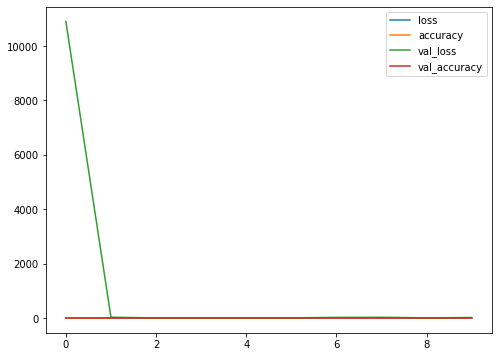

In [ ]:
# data processing
import tensorflow as tf
import pandas as pd
data = "Alzheimer_s Dataset/train"
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    data,
    labels = 'inferred',
    label_mode='categorical',
    seed=42,
    color_mode='grayscale',
    image_size=(128,128),
    batch_size=32,
)
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    "Alzheimer_s Dataset/test",
    labels = 'inferred',
    label_mode='categorical',
    seed=42,
    color_mode= 'grayscale',
    image_size = (128,128),
    batch_size=32,
)

#Model setup
EffNet = tf.keras.applications.EfficientNetB0(include_top = False)
EffNet.trainable = True
inputs = tf.keras.layers.Input(shape=((128,128) + (1,)), name = 'input_layer')
x = EffNet(inputs)
x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
outputs = tf.keras.layers.Dense(4, activation = 'softmax', name='output_layer')(x)
model = tf.keras.Model(inputs, outputs)
Learning_Rate = 0.1
model.compile(loss='categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = Learning_Rate), metrics=['accuracy'])
model.summary()

#Training the Model
graphs = model.fit(train_data, validation_data = test_data, epochs = 10, verbose = False)
pd.DataFrame(graphs.history).plot(figsize=(8,6))

#check the performance
model.evaluate(test_data)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 128, 128, 1)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 4)                 5124      
                                                                 
Total params: 4,054,695
Trainable params: 4,012,672
Non-trainable params: 42,023
_________________________________________________________________


40/40 [==============================] - 1s 26ms/step - loss: 1.3071 - accuracy: 0.6216


[1.3070911169052124, 0.6215793490409851]

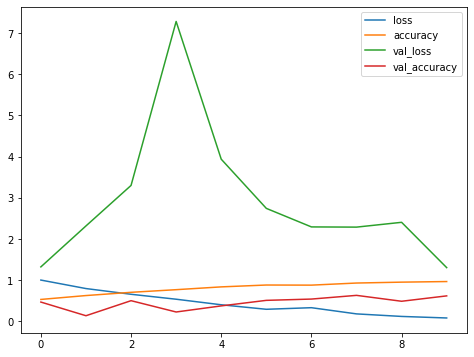

In [ ]:
#Model Changing the learning rate
EffNet = tf.keras.applications.EfficientNetB0(include_top = False)
EffNet.trainable = True
inputs = tf.keras.layers.Input(shape=((128,128) + (1,)), name = 'input_layer')
x = EffNet(inputs)
x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
outputs = tf.keras.layers.Dense(4, activation = 'softmax', name='output_layer')(x)
model = tf.keras.Model(inputs, outputs)
Learning_Rate = 0.01
model.compile(loss='categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = Learning_Rate), metrics=['accuracy'])
model.summary()

#Training the Model
graphs = model.fit(train_data, validation_data = test_data, epochs = 10, verbose = False)
pd.DataFrame(graphs.history).plot(figsize=(8,6))

#check the performance
model.evaluate(test_data)

In [ ]:
model.save("drive/My Drive/Alzheimers_Mri_Segmentation/models/effnet/effnet.h5")

In [ ]:
import cv2
from sklearn.preprocessing import StandardScaler
import matplotlib.image as mpimg

from skimage.transform import resize

import numpy as np

dim = (128, 128) #original shape of the image

def extract_feature(dir_path):
    img = mpimg.imread(dir_path)
    img = img / 255.0  # normalize pixel values
    img = resize(img, (128, 128, 3))  # convert all images to (128x128x3)
    img = np.reshape(img, (128, 384))
    return img

non_ALZ = [extract_feature(filename) for filename in non]
vmild_ALZ = [extract_feature(filename) for filename in very_mild]
mild_ALZ = [extract_feature(filename) for filename in mild]
moderate_ALZ = [extract_feature(filename) for filename in moderate]
ALZ = vmild_ALZ + mild_ALZ + moderate_ALZ

#for PCA
all_data = np.concatenate((np.array(non_ALZ),np.array(ALZ)))
#print(all_data)
all_data = all_data.reshape(all_data.shape[0], np.product(all_data.shape[1:]))

scaler = StandardScaler()
scaler.fit(all_data)

#standardize data to 0 mean and unit variance
X = scaler.transform(all_data)

#split the data 
from sklearn.model_selection import train_test_split
y = [0] * len(non_ALZ) + [1] * len(ALZ)
X_train, X_test, y_train, y_test = train_test_split(all_data, y, test_size=0.2)

#convert grayscale to 128x128 rgb channels
def to_rgb(img):
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 
    img_rgb = np.asarray(np.dstack((img, img, img)), dtype=np.uint8)
    return img_rgb

rgb_list = []
#convert X_train data to 128x128 rgb values
for i in range(len(X_train)):
    rgb = to_rgb(X_train[i])
    rgb_list.append(rgb)
    #print(rgb.shape)
    
rgb_arr = np.stack([rgb_list],axis=4)
rgb_arr_to_3d = np.squeeze(rgb_arr, axis=4)
print(rgb_arr_to_3d.shape)

(4096, 128, 128, 3)


In [ ]:
rgb_list_test = []
#convert X_test data to 128x128 rgb values
for i in range(len(X_test)):
    rgb = to_rgb(X_test[i])
    rgb_list_test.append(rgb)
    #print(rgb.shape)
    
rgb_arr_test = np.stack([rgb_list_test],axis=4)
rgb_arr_to_3d_test = np.squeeze(rgb_arr_test, axis=4)
print(rgb_arr_to_3d_test.shape)

(1025, 128, 128, 3)


In [ ]:
#set up the environment
import keras
from keras.models import Sequential, Model
from keras.layers import Flatten, Dense, Input, Dropout
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image

vgg16 = VGG16(weights = 'imagenet', input_shape = (128, 128, 3), include_top = False)
vgg16.summary()

vgg16.trainable = False
final_model = Sequential()
final_model.add(vgg16)
final_model.add(Dropout(0.2))
final_model.add(Flatten(name='flatten'))
final_model.add(Dense(2,activation = 'softmax', name = 'predictions'))
final_model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

final_model.fit(rgb_arr_to_3d, np.array(y_train).reshape(-1,1), batch_size = 7, epochs = 10, verbose = 1)
final_model.fit(rgb_arr_to_3d_test, np.array(y_test).reshape(-1,1), batch_size = 7, epochs = 10, verbose = 1)

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:
 final_model.evaluate(rgb_arr_to_3d_test, np.array(y_test).reshape(-1,1))

33/33 [==============================] - 2s 48ms/step - loss: 0.7850 - accuracy: 0.4995


[0.7850306034088135, 0.4995121955871582]